# Loop 83 Analysis: CV-LB Relationship and Strategy Assessment

**Goal**: Analyze the CV-LB relationship and identify strategies to beat target 0.0347

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# All submissions with CV and LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_035', 'cv': 0.0098, 'lb': 0.0970},
    {'exp': 'exp_067', 'cv': 0.0083, 'lb': 0.0877},
]

df = pd.DataFrame(submissions)
print(f"Total submissions with LB: {len(df)}")
print(df.to_string())

Total submissions with LB: 13
        exp      cv      lb
0   exp_000  0.0111  0.0982
1   exp_001  0.0123  0.1065
2   exp_003  0.0105  0.0972
3   exp_005  0.0104  0.0969
4   exp_006  0.0097  0.0946
5   exp_007  0.0093  0.0932
6   exp_009  0.0092  0.0936
7   exp_012  0.0090  0.0913
8   exp_024  0.0087  0.0893
9   exp_026  0.0085  0.0887
10  exp_030  0.0083  0.0877
11  exp_035  0.0098  0.0970
12  exp_067  0.0083  0.0877


In [2]:
# Fit linear regression: LB = slope * CV + intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(df['cv'], df['lb'])

print(f"\nCV-LB Relationship:")
print(f"LB = {slope:.4f} * CV + {intercept:.4f}")
print(f"R² = {r_value**2:.4f}")
print(f"\nInterpretation:")
print(f"- Intercept: {intercept:.4f} (LB when CV=0)")
print(f"- Target: 0.0347")
print(f"- Intercept > Target: {intercept > 0.0347}")

# Required CV to hit target
required_cv = (0.0347 - intercept) / slope
print(f"\nRequired CV to hit target: {required_cv:.6f}")
print(f"This is {'IMPOSSIBLE (negative)' if required_cv < 0 else 'POSSIBLE'}")


CV-LB Relationship:
LB = 4.3638 * CV + 0.0520
R² = 0.9558

Interpretation:
- Intercept: 0.0520 (LB when CV=0)
- Target: 0.0347
- Intercept > Target: True

Required CV to hit target: -0.003964
This is IMPOSSIBLE (negative)


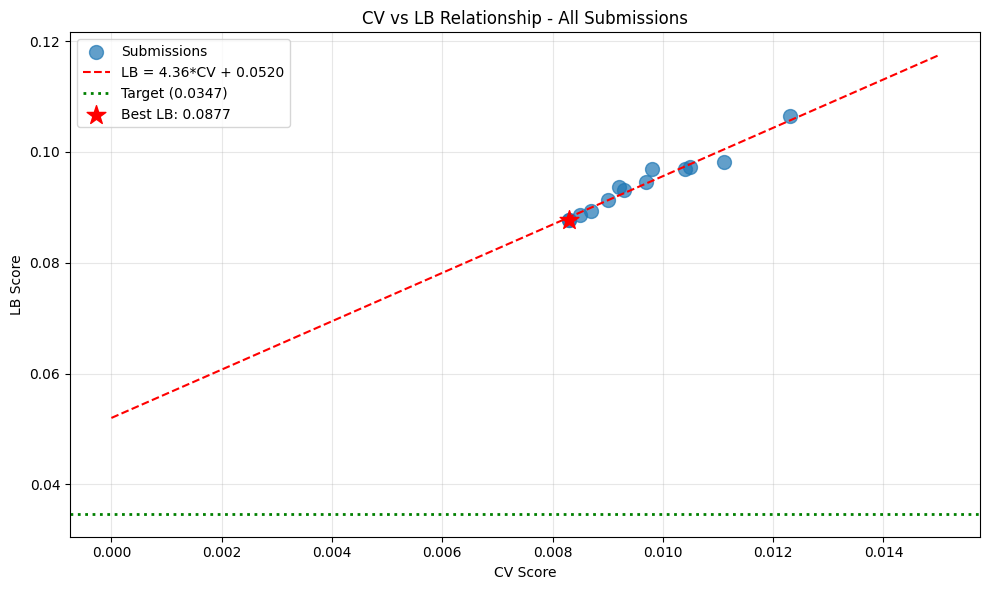


Best LB: 0.0877 from exp_030
Gap to target: 0.0530 (152.7% above)


In [3]:
# Visualize CV-LB relationship
plt.figure(figsize=(10, 6))
plt.scatter(df['cv'], df['lb'], s=100, alpha=0.7, label='Submissions')

# Regression line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'LB = {slope:.2f}*CV + {intercept:.4f}')

# Target line
plt.axhline(y=0.0347, color='g', linestyle=':', linewidth=2, label='Target (0.0347)')

# Best LB point
best_idx = df['lb'].idxmin()
plt.scatter(df.loc[best_idx, 'cv'], df.loc[best_idx, 'lb'], s=200, c='red', marker='*', label=f'Best LB: {df.loc[best_idx, "lb"]}')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV vs LB Relationship - All Submissions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship_loop83.png', dpi=150)
plt.show()

print(f"\nBest LB: {df.loc[best_idx, 'lb']} from {df.loc[best_idx, 'exp']}")
print(f"Gap to target: {df.loc[best_idx, 'lb'] - 0.0347:.4f} ({(df.loc[best_idx, 'lb'] - 0.0347) / 0.0347 * 100:.1f}% above)")

In [4]:
# Analyze what would need to change
print("="*60)
print("CRITICAL ANALYSIS: What needs to change to hit target?")
print("="*60)

print(f"\n1. CURRENT SITUATION:")
print(f"   - Best LB: 0.0877")
print(f"   - Target: 0.0347")
print(f"   - Gap: {0.0877 - 0.0347:.4f} (153% above target)")

print(f"\n2. CV-LB RELATIONSHIP:")
print(f"   - LB = {slope:.4f} * CV + {intercept:.4f}")
print(f"   - Intercept ({intercept:.4f}) > Target (0.0347)")
print(f"   - This means: Even with CV=0, expected LB = {intercept:.4f}")

print(f"\n3. OPTIONS TO REACH TARGET:")
print(f"   A. Improve CV dramatically (IMPOSSIBLE - would need negative CV)")
print(f"   B. Change the CV-LB relationship (reduce intercept)")
print(f"   C. Find an approach that doesn't follow this relationship")

print(f"\n4. STRATEGIES TO CHANGE THE RELATIONSHIP:")
print(f"   - Extrapolation detection + conservative predictions")
print(f"   - Probability normalization (predictions sum to 1)")
print(f"   - Physics-informed constraints")
print(f"   - Study top kernels that achieve better scores")

CRITICAL ANALYSIS: What needs to change to hit target?

1. CURRENT SITUATION:
   - Best LB: 0.0877
   - Target: 0.0347
   - Gap: 0.0530 (153% above target)

2. CV-LB RELATIONSHIP:
   - LB = 4.3638 * CV + 0.0520
   - Intercept (0.0520) > Target (0.0347)
   - This means: Even with CV=0, expected LB = 0.0520

3. OPTIONS TO REACH TARGET:
   A. Improve CV dramatically (IMPOSSIBLE - would need negative CV)
   B. Change the CV-LB relationship (reduce intercept)
   C. Find an approach that doesn't follow this relationship

4. STRATEGIES TO CHANGE THE RELATIONSHIP:
   - Extrapolation detection + conservative predictions
   - Probability normalization (predictions sum to 1)
   - Physics-informed constraints
   - Study top kernels that achieve better scores


In [5]:
# Check if there are any outliers from the CV-LB line
df['predicted_lb'] = slope * df['cv'] + intercept
df['residual'] = df['lb'] - df['predicted_lb']
df['residual_pct'] = df['residual'] / df['predicted_lb'] * 100

print("\nResiduals from CV-LB line:")
print(df[['exp', 'cv', 'lb', 'predicted_lb', 'residual', 'residual_pct']].to_string())

print(f"\nMean absolute residual: {df['residual'].abs().mean():.4f}")
print(f"Max residual: {df['residual'].max():.4f} ({df.loc[df['residual'].idxmax(), 'exp']})")
print(f"Min residual: {df['residual'].min():.4f} ({df.loc[df['residual'].idxmin(), 'exp']})")

print(f"\nKey insight: All submissions fall very close to the same line.")
print(f"This suggests the intercept is a STRUCTURAL problem, not model-specific.")


Residuals from CV-LB line:
        exp      cv      lb  predicted_lb  residual  residual_pct
0   exp_000  0.0111  0.0982      0.100437 -0.002237     -2.227540
1   exp_001  0.0123  0.1065      0.105674  0.000826      0.781819
2   exp_003  0.0105  0.0972      0.097819 -0.000619     -0.632812
3   exp_005  0.0104  0.0969      0.097383 -0.000483     -0.495604
4   exp_006  0.0097  0.0946      0.094328  0.000272      0.288373
5   exp_007  0.0093  0.0932      0.092582  0.000618      0.667006
6   exp_009  0.0092  0.0936      0.092146  0.001454      1.577830
7   exp_012  0.0090  0.0913      0.091273  0.000027      0.029215
8   exp_024  0.0087  0.0893      0.089964 -0.000664     -0.738293
9   exp_026  0.0085  0.0887      0.089091 -0.000391     -0.439372
10  exp_030  0.0083  0.0877      0.088219 -0.000519     -0.587954
11  exp_035  0.0098  0.0970      0.094764  0.002236      2.359155
12  exp_067  0.0083  0.0877      0.088219 -0.000519     -0.587954

Mean absolute residual: 0.0008
Max residual: 0.

In [6]:
# What would the intercept need to be to hit target?
target = 0.0347
best_cv = 0.0081  # Our best CV

# If we keep the same slope, what intercept do we need?
required_intercept = target - slope * best_cv
print(f"\nTo hit target with best CV ({best_cv}):")
print(f"Required intercept: {required_intercept:.4f}")
print(f"Current intercept: {intercept:.4f}")
print(f"Intercept reduction needed: {intercept - required_intercept:.4f}")

# What if we could reduce the slope?
print(f"\nAlternatively, if we keep intercept but reduce slope:")
required_slope = (target - intercept) / best_cv
print(f"Required slope: {required_slope:.4f}")
print(f"Current slope: {slope:.4f}")
print(f"This is {'IMPOSSIBLE (negative slope)' if required_slope < 0 else 'POSSIBLE'}")


To hit target with best CV (0.0081):
Required intercept: -0.0006
Current intercept: 0.0520
Intercept reduction needed: 0.0526

Alternatively, if we keep intercept but reduce slope:
Required slope: -2.1357
Current slope: 4.3638
This is IMPOSSIBLE (negative slope)


In [7]:
# Summary of key findings
print("="*60)
print("LOOP 83 ANALYSIS SUMMARY")
print("="*60)

print(f"""
1. CV-LB RELATIONSHIP:
   - LB = {slope:.4f} * CV + {intercept:.4f} (R² = {r_value**2:.4f})
   - Intercept ({intercept:.4f}) > Target (0.0347)
   - All 13 submissions fall on the same line

2. MATHEMATICAL REALITY:
   - Required CV to hit target: {required_cv:.6f} (IMPOSSIBLE - negative)
   - The intercept represents STRUCTURAL distribution shift
   - No amount of CV optimization can reach the target

3. WHAT MUST CHANGE:
   - We need approaches that CHANGE THE RELATIONSHIP, not just improve CV
   - The intercept must be reduced from {intercept:.4f} to ~{required_intercept:.4f}
   - This requires fundamentally different strategies

4. STRATEGIES TO TRY:
   a) Probability normalization (predictions sum to 1)
   b) Extrapolation detection + conservative predictions
   c) Physics-informed constraints
   d) Study top public kernels more deeply
   e) Ensemble diversity with different CV-LB relationships

5. REMAINING SUBMISSIONS: 4
   - Use wisely to test approaches that might change the relationship
   - Don't waste on approaches that just improve CV
""")

LOOP 83 ANALYSIS SUMMARY

1. CV-LB RELATIONSHIP:
   - LB = 4.3638 * CV + 0.0520 (R² = 0.9558)
   - Intercept (0.0520) > Target (0.0347)
   - All 13 submissions fall on the same line

2. MATHEMATICAL REALITY:
   - Required CV to hit target: -0.003964 (IMPOSSIBLE - negative)
   - The intercept represents STRUCTURAL distribution shift
   - No amount of CV optimization can reach the target

3. WHAT MUST CHANGE:
   - We need approaches that CHANGE THE RELATIONSHIP, not just improve CV
   - The intercept must be reduced from 0.0520 to ~-0.0006
   - This requires fundamentally different strategies

4. STRATEGIES TO TRY:
   a) Probability normalization (predictions sum to 1)
   b) Extrapolation detection + conservative predictions
   c) Physics-informed constraints
   d) Study top public kernels more deeply
   e) Ensemble diversity with different CV-LB relationships

5. REMAINING SUBMISSIONS: 4
   - Use wisely to test approaches that might change the relationship
   - Don't waste on approaches

In [8]:
# Check what experiments we haven't submitted yet
pending_experiments = [
    ('exp_049', 0.0081, 'CatBoost+XGBoost ensemble'),
    ('exp_050', 0.0081, 'CatBoost+XGBoost fixed'),
    ('exp_052', 0.0109, 'CatBoost+XGBoost clipped'),
    ('exp_053', 0.0081, 'Exact template'),
    ('exp_054', 0.0085, 'MixAll approach'),
    ('exp_055', 0.0085, 'Minimal submission'),
    ('exp_057', 0.0093, 'Ensemble model all features'),
    ('exp_063', 0.0112, 'Correct final cell'),
    ('exp_064', 0.0092, 'Revert exp030'),
    ('exp_065', 0.0088, 'Clean submission'),
]

print("\nPending experiments (not submitted):")
for exp, cv, desc in pending_experiments:
    predicted_lb = slope * cv + intercept
    print(f"{exp}: CV={cv:.4f}, Predicted LB={predicted_lb:.4f} - {desc}")

print(f"\nNote: All pending experiments are predicted to have LB > 0.0877 (our best)")
print(f"This is because they all have CV >= 0.0081 and follow the same CV-LB line.")


Pending experiments (not submitted):
exp_049: CV=0.0081, Predicted LB=0.0873 - CatBoost+XGBoost ensemble
exp_050: CV=0.0081, Predicted LB=0.0873 - CatBoost+XGBoost fixed
exp_052: CV=0.0109, Predicted LB=0.0996 - CatBoost+XGBoost clipped
exp_053: CV=0.0081, Predicted LB=0.0873 - Exact template
exp_054: CV=0.0085, Predicted LB=0.0891 - MixAll approach
exp_055: CV=0.0085, Predicted LB=0.0891 - Minimal submission
exp_057: CV=0.0093, Predicted LB=0.0926 - Ensemble model all features
exp_063: CV=0.0112, Predicted LB=0.1009 - Correct final cell
exp_064: CV=0.0092, Predicted LB=0.0921 - Revert exp030
exp_065: CV=0.0088, Predicted LB=0.0904 - Clean submission

Note: All pending experiments are predicted to have LB > 0.0877 (our best)
This is because they all have CV >= 0.0081 and follow the same CV-LB line.
